#### Visualizing Hierachies

Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

In [1]:
import extra # Just a file containg datapoints
import numpy as np
import pandas as pd

In [2]:
samples = extra.samples
varieties = extra.varieties

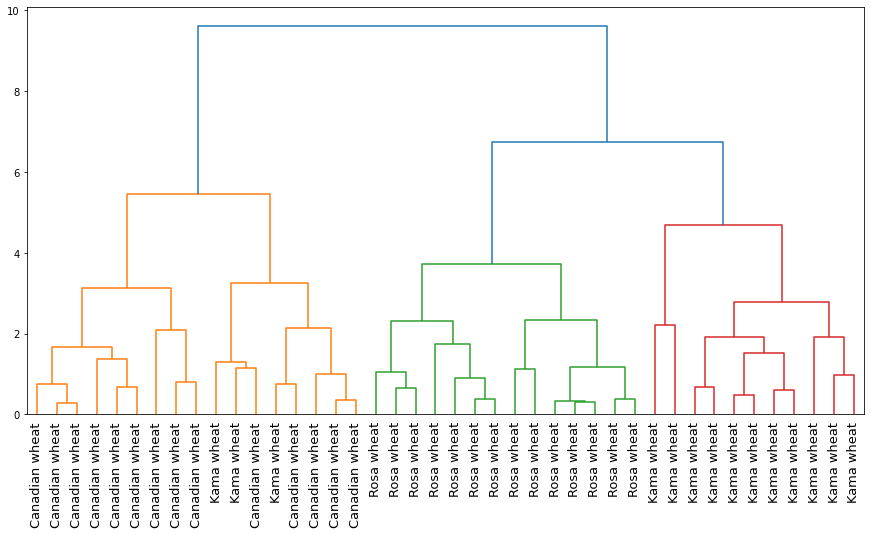

In [3]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,7.5))
dendrogram(mergings,
           labels = varieties,
           leaf_rotation = 90,
           leaf_font_size = 13,
)
plt.show()

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

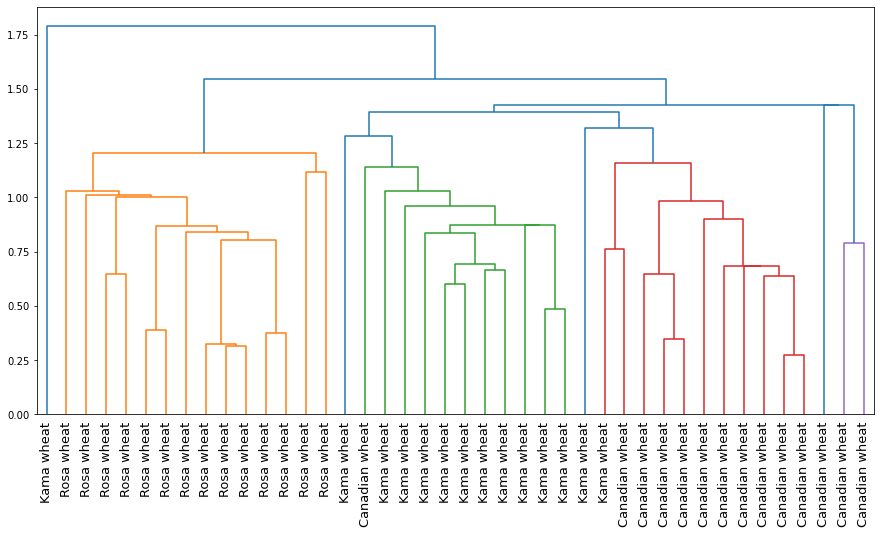

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'single')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,7.5))
dendrogram(mergings,
           labels = varieties,
           leaf_rotation = 90,
           leaf_font_size = 13,
)
plt.show()

From the above dendrograms it can be seen that different linkages result in different clustering.

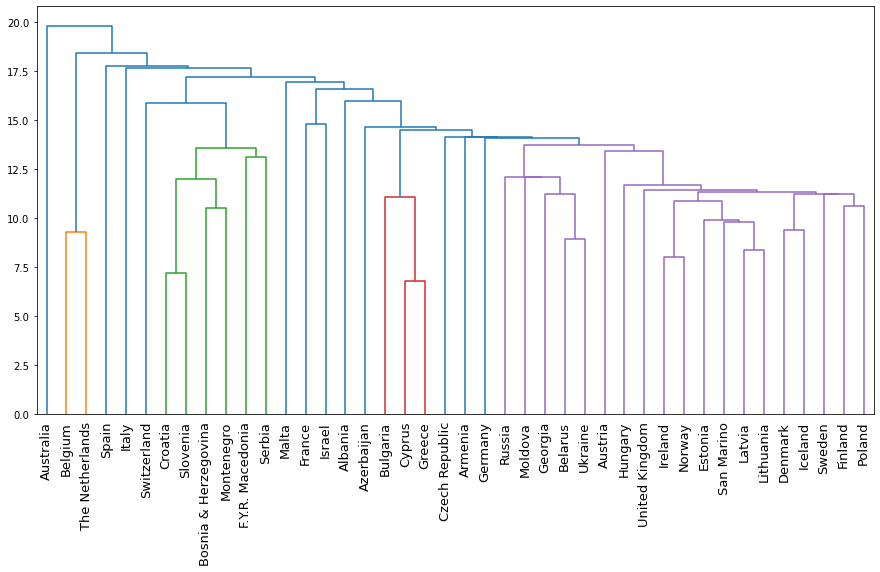

In [5]:

# Perform the necessary imports
#import matplotlib.pyplot as plt
#from scipy.cluster.hierarchy import linkage, dendrogram
samples = extra.samples1
country_names = extra.country_names
# Calculate the linkage: mergings
mergings = linkage(samples, method = 'single')

# Plot the dendrogram
plt.figure(figsize=(15,7.5))
dendrogram(mergings, labels = country_names, leaf_rotation = 90, leaf_font_size = 13)
plt.show()


#### Extracting the cluster labels

In [6]:
samples = extra.samples
varieties = extra.varieties

mergings = linkage(samples, method = 'complete')

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, t = 6, criterion = 'distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


#### t-SNE for 2-dimensional maps


t-SNE stands for "t-distributed stochastic neighbor embedding". It has a complicated name, but it serves a very simple purpose. It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized. While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding a dataset.

t-SNE is available in scikit-learn, but it works a little differently to the fit/transform components you've already met. 

t-SNE only has a fit_transform method. As you might expect, the fit_transform method simultaneously fits the model and transforms the data. However, t-SNE does not have separate fit and transform methods. This means that you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.

The second thing to notice is the learning rate. The learning rate makes the use of t-SNE more complicated than some other techniques. You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200.

A final thing to be aware of is that the axes of a t-SNE plot do not have any interpretable meaning. In fact, they are different every time t-SNE is applied, even on the same data. 

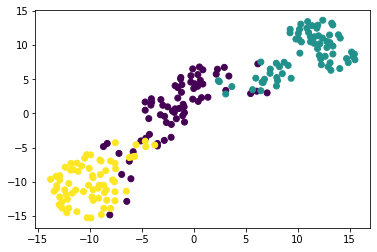

In [7]:
variety_numbers = extra.variety_numbers
samples = extra.samples3

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

variety_numbers = extra.variety_numbers
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = variety_numbers)
plt.show()

As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples.

In [8]:
normalized_movements = extra.normalized_movements
companies = extra.companies

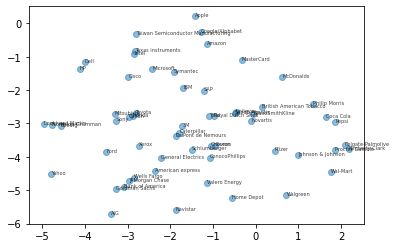

In [12]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha = 0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()